In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

# get data

In [71]:
dataD10A1Lin = []
for i in range(1):
    f_num = i+1 
    file_name = "jso_F" + str(f_num) + "_D10_Atype1_lin.json"
    tmp = pd.read_json(file_name)
    dataD10A1Lin.append(tmp)

In [22]:
display(dataD10A1Lin[0].head(2))
display(dataD10A1Lin[1].head(2))

,best_found_value,best_found_solution,best_found_NFES,best_found_generation,cec2022_stats,convergence,diversity_population,diversity_archive
0,310.523390,"[-55.0240634497, 5.7813949951, 33.2203488227, ...",20000,426,"[20556.6184503223, 20556.6184503223, 20556.618...","[64796157758.52865, 64796157758.52865, 417987....","[3996980.3028867855, 3996980.3028867855, 39969...","[7383518.500212841, 7383518.500212841, 7383518..."
1,311.417176,"[-57.4621768732, 5.0031289418, 35.512231838299...",20000,426,"[48920.5418890542, 48920.5418890542, 48920.541...","[8891657.12800646, 190016.6747789837, 190016.6...","[4103686.913439923, 4103686.913439923, 4103686...","[6883251.68306073, 6883251.68306073, 6883251.6..."


,best_found_value,best_found_solution,best_found_NFES,best_found_generation,cec2022_stats,convergence,diversity_population,diversity_archive
0,405.312810,"[82.600954443, 63.4296403874, -84.3783837347, ...",20000,426,"[1139.4257359578, 1139.4257359578, 1139.425735...","[4450.2121682274, 4450.2121682274, 4450.212168...","[4050736.100855312, 4050736.100855312, 4050736...","[9659324.975257393, 9659324.975257393, 9659324..."
1,405.443635,"[82.5763135145, 64.8267209616, -85.0388899189,...",19999,426,"[1811.1241557074, 1811.1241557074, 1811.124155...","[56472.2357294511, 6895.9976720044, 6895.99767...","[4102060.654507173, 4102060.654507173, 4102060...","[8960754.778856555, 8960754.778856555, 8960754..."


In [23]:
dataD10A1Lin[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   best_found_value       11 non-null     float64
 1   best_found_solution    11 non-null     object 
 2   best_found_NFES        11 non-null     int64  
 3   best_found_generation  11 non-null     int64  
 4   cec2022_stats          11 non-null     object 
 5   convergence            11 non-null     object 
 6   diversity_population   11 non-null     object 
 7   diversity_archive      11 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 792.0+ bytes


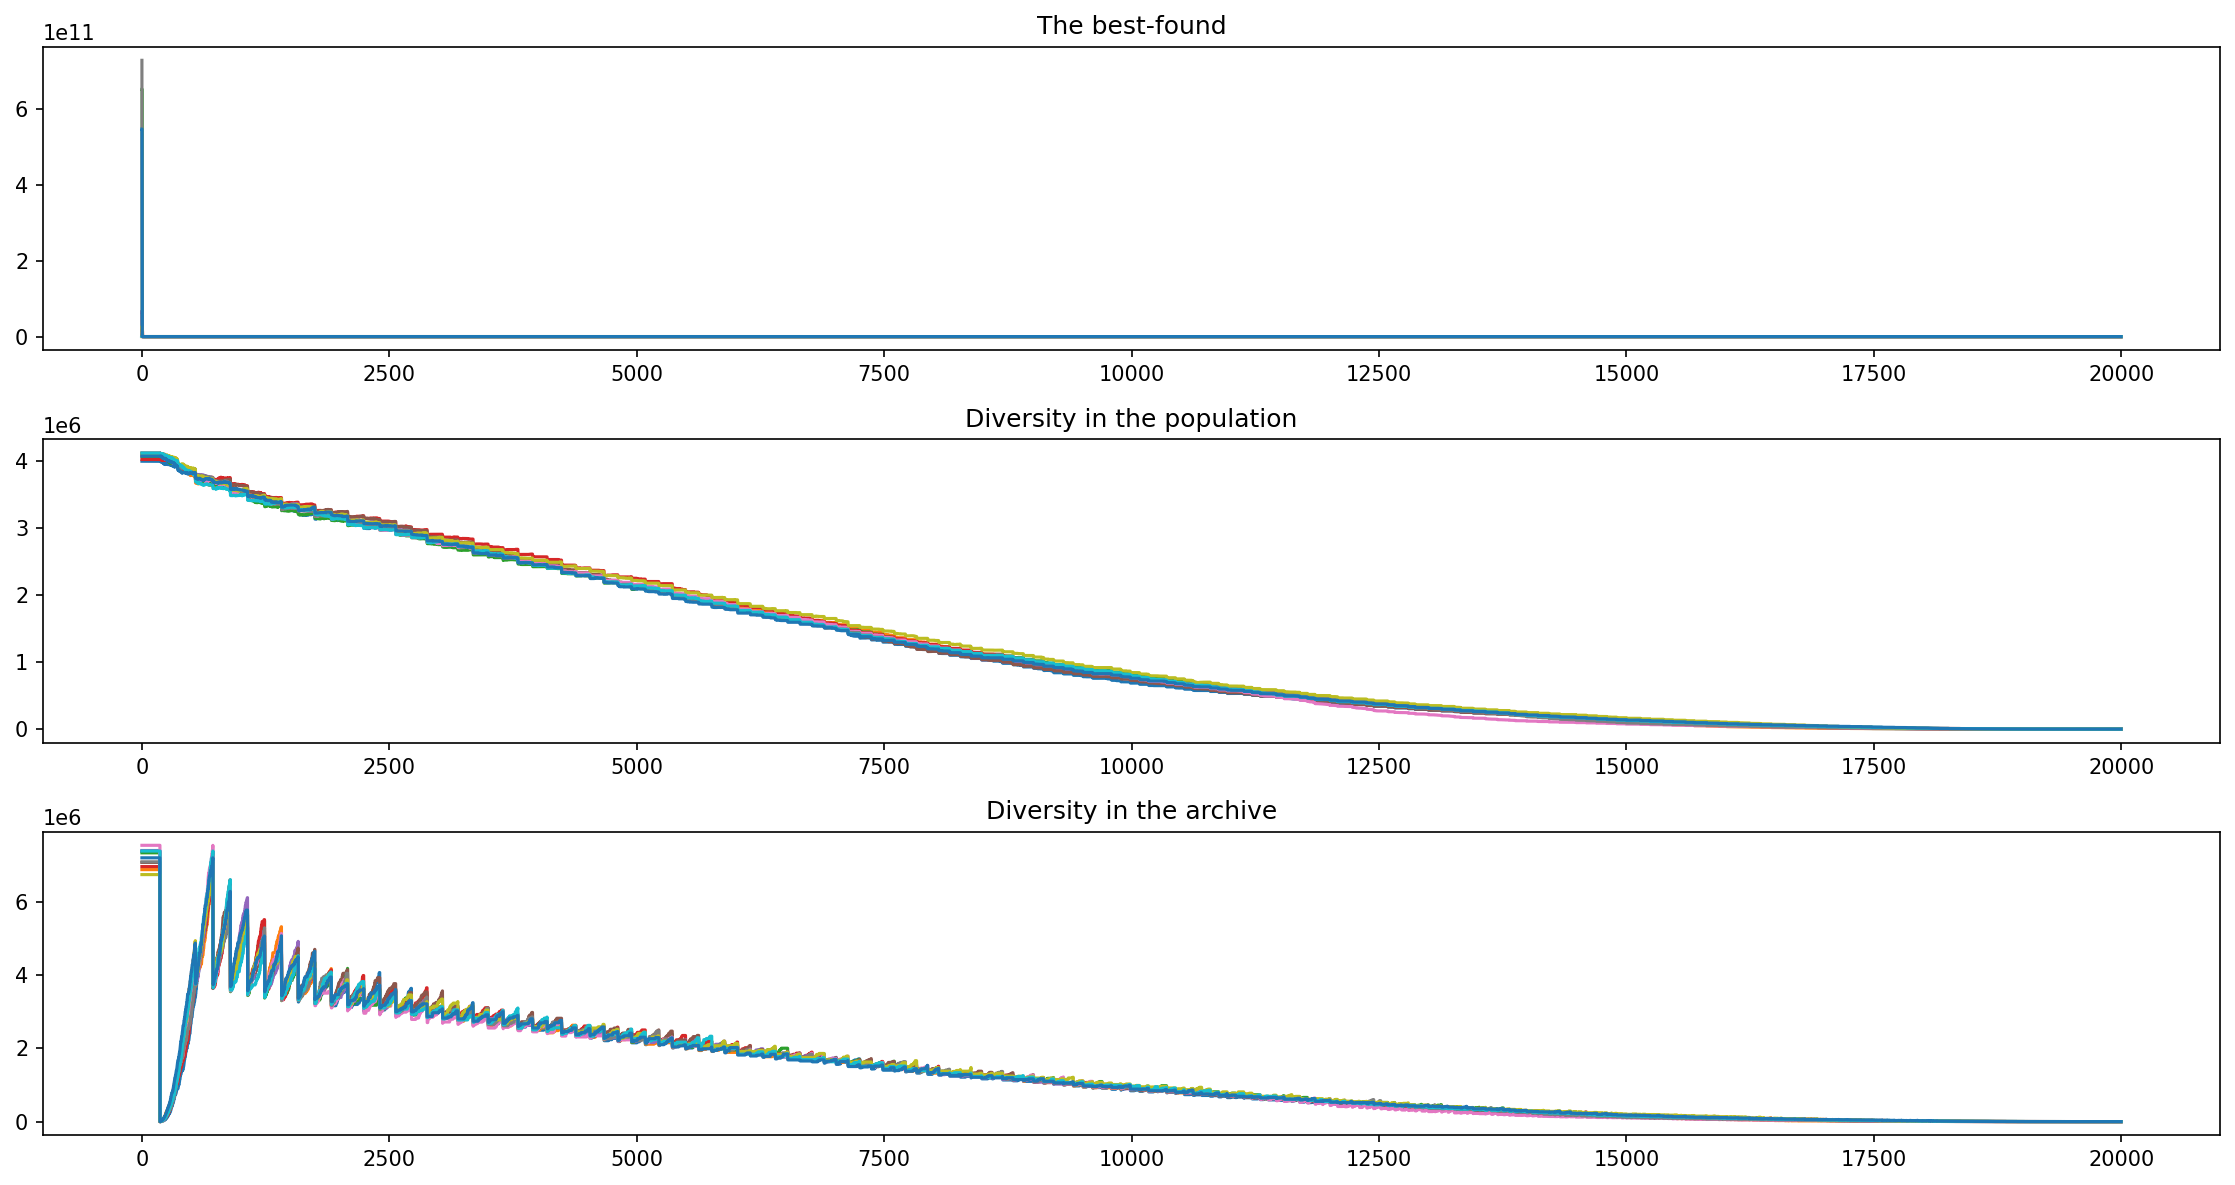

In [32]:
func = 1
runs = dataD10A1Lin[func-1].shape[0]
fig, ax = plt.subplots(nrows=3, dpi=150, figsize=(15,8), facecolor='white')
for i in range(runs):
    ax[0].plot(dataD10A1Lin[func-1]['convergence'][i])
    ax[0].set_title("The best-found")
    ax[1].plot(dataD10A1Lin[func-1]['diversity_population'][i])
    ax[1].set_title("Diversity in the population")
    ax[2].plot(dataD10A1Lin[func-1]['diversity_archive'][i])
    ax[2].set_title("Diversity in the archive")
fig.tight_layout()
plt.show()

In [64]:
len(dataD10A1Lin[0]['convergence'][0])

20000

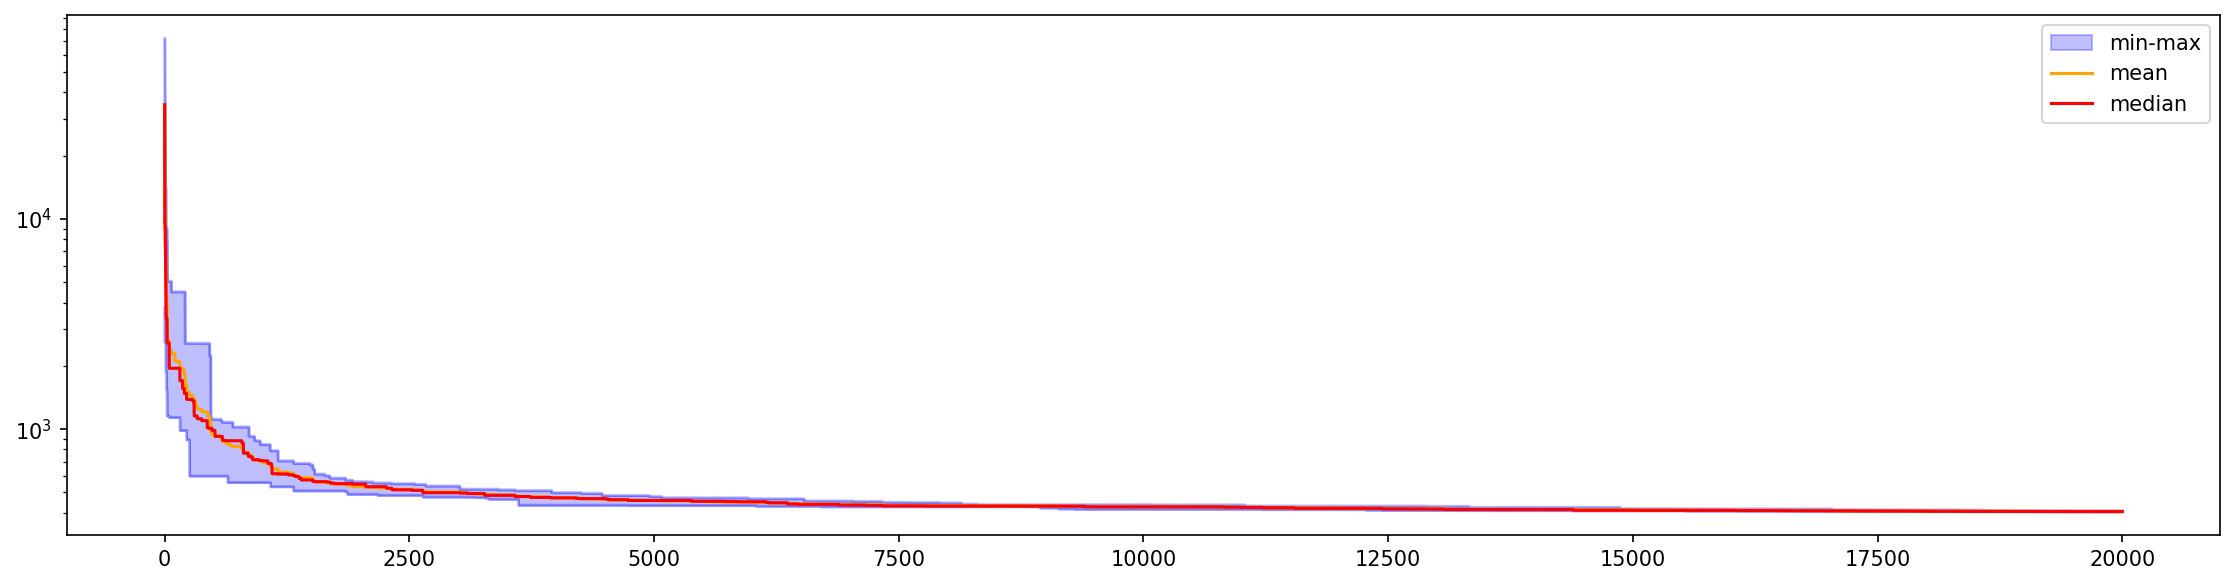

In [60]:
func = 2
stat = pd.DataFrame()
stat2 = pd.DataFrame()
for i in range(runs):
    stat[i] = dataD10A1Lin[func-1]['convergence'][i]
stat2['min'] = stat.min(axis=1)
stat2['max'] = stat.max(axis=1)
stat2['mean'] = stat.mean(axis=1)
stat2['std'] = stat.std(axis=1)
stat2['median'] = stat.median(axis=1)

x = np.arange(0,len(dataD10A1Lin[0]['convergence'][0]))
fig, ax = plt.subplots(dpi=150, figsize=(15,4), facecolor='white')
ax.set_yscale('log')
#ax.set_xscale('log')
var_alpha = 0.25
ax.plot(stat2['min'], color='blue', alpha=var_alpha)
ax.plot(stat2['max'], color='blue', alpha=var_alpha)
ax.fill_between(x,stat2['min'],stat2['max'], color='blue', alpha=var_alpha, label='min-max')
ax.plot(stat2['mean'], color='orange', label='mean')
ax.plot(stat2['median'], color='red', label='median')
ax.legend()
#ax.set_xlim(0,50)
#ax.set_ylim(0,10000)
fig.tight_layout()
plt.show()


In [67]:
def draw_stats_func(func):
    x = np.arange(0,len(dataD10A1Lin[0]['convergence'][0]))

    fig, ax = plt.subplots(nrows=3, dpi=150, figsize=(15,9), facecolor='white')
    var_alpha = 0.25
    
    stat = pd.DataFrame()
    stat2 = pd.DataFrame()
    for i in range(runs):
        stat[i] = dataD10A1Lin[func-1]['convergence'][i]
    stat2['min'] = stat.min(axis=1)
    stat2['max'] = stat.max(axis=1)
    stat2['mean'] = stat.mean(axis=1)
    stat2['std'] = stat.std(axis=1)
    stat2['median'] = stat.median(axis=1)

    ax[0].set_yscale('log')
    ax[0].plot(stat2['min'], color='blue', alpha=var_alpha)
    ax[0].plot(stat2['max'], color='blue', alpha=var_alpha)
    ax[0].fill_between(x,stat2['min'],stat2['max'], color='blue', alpha=var_alpha, label='min-max')
    ax[0].plot(stat2['mean'], color='orange', label='mean')
    ax[0].plot(stat2['median'], color='red', label='median')
    ax[0].set_title("The best-found")
    ax[0].legend()
    
    stat = pd.DataFrame()
    stat2 = pd.DataFrame()
    for i in range(runs):
        stat[i] = dataD10A1Lin[func-1]['diversity_population'][i]
    stat2['min'] = stat.min(axis=1)
    stat2['max'] = stat.max(axis=1)
    stat2['mean'] = stat.mean(axis=1)
    stat2['std'] = stat.std(axis=1)
    stat2['median'] = stat.median(axis=1)

    #ax[1].set_yscale('log')
    ax[1].plot(stat2['min'], color='blue', alpha=var_alpha)
    ax[1].plot(stat2['max'], color='blue', alpha=var_alpha)
    ax[1].fill_between(x,stat2['min'],stat2['max'], color='blue', alpha=var_alpha, label='min-max')
    ax[1].plot(stat2['mean'], color='orange', label='mean')
    ax[1].plot(stat2['median'], color='red', label='median')
    ax[1].set_title("Diversity in the population")
    ax[1].legend()

    stat = pd.DataFrame()
    stat2 = pd.DataFrame()
    for i in range(runs):
        stat[i] = dataD10A1Lin[func-1]['diversity_archive'][i]
    stat2['min'] = stat.min(axis=1)
    stat2['max'] = stat.max(axis=1)
    stat2['mean'] = stat.mean(axis=1)
    stat2['std'] = stat.std(axis=1)
    stat2['median'] = stat.median(axis=1)

    #ax[2].set_yscale('log')
    ax[2].plot(stat2['min'], color='blue', alpha=var_alpha)
    ax[2].plot(stat2['max'], color='blue', alpha=var_alpha)
    ax[2].fill_between(x,stat2['min'],stat2['max'], color='blue', alpha=var_alpha, label='min-max')
    ax[2].plot(stat2['mean'], color='orange', label='mean')
    ax[2].plot(stat2['median'], color='red', label='median')
    ax[2].set_title("Diversity in the archive")
    ax[2].legend()

    #ax.set_xlim(0,50)
    #ax.set_ylim(0,10000)
    fig.tight_layout()
    plt.show()

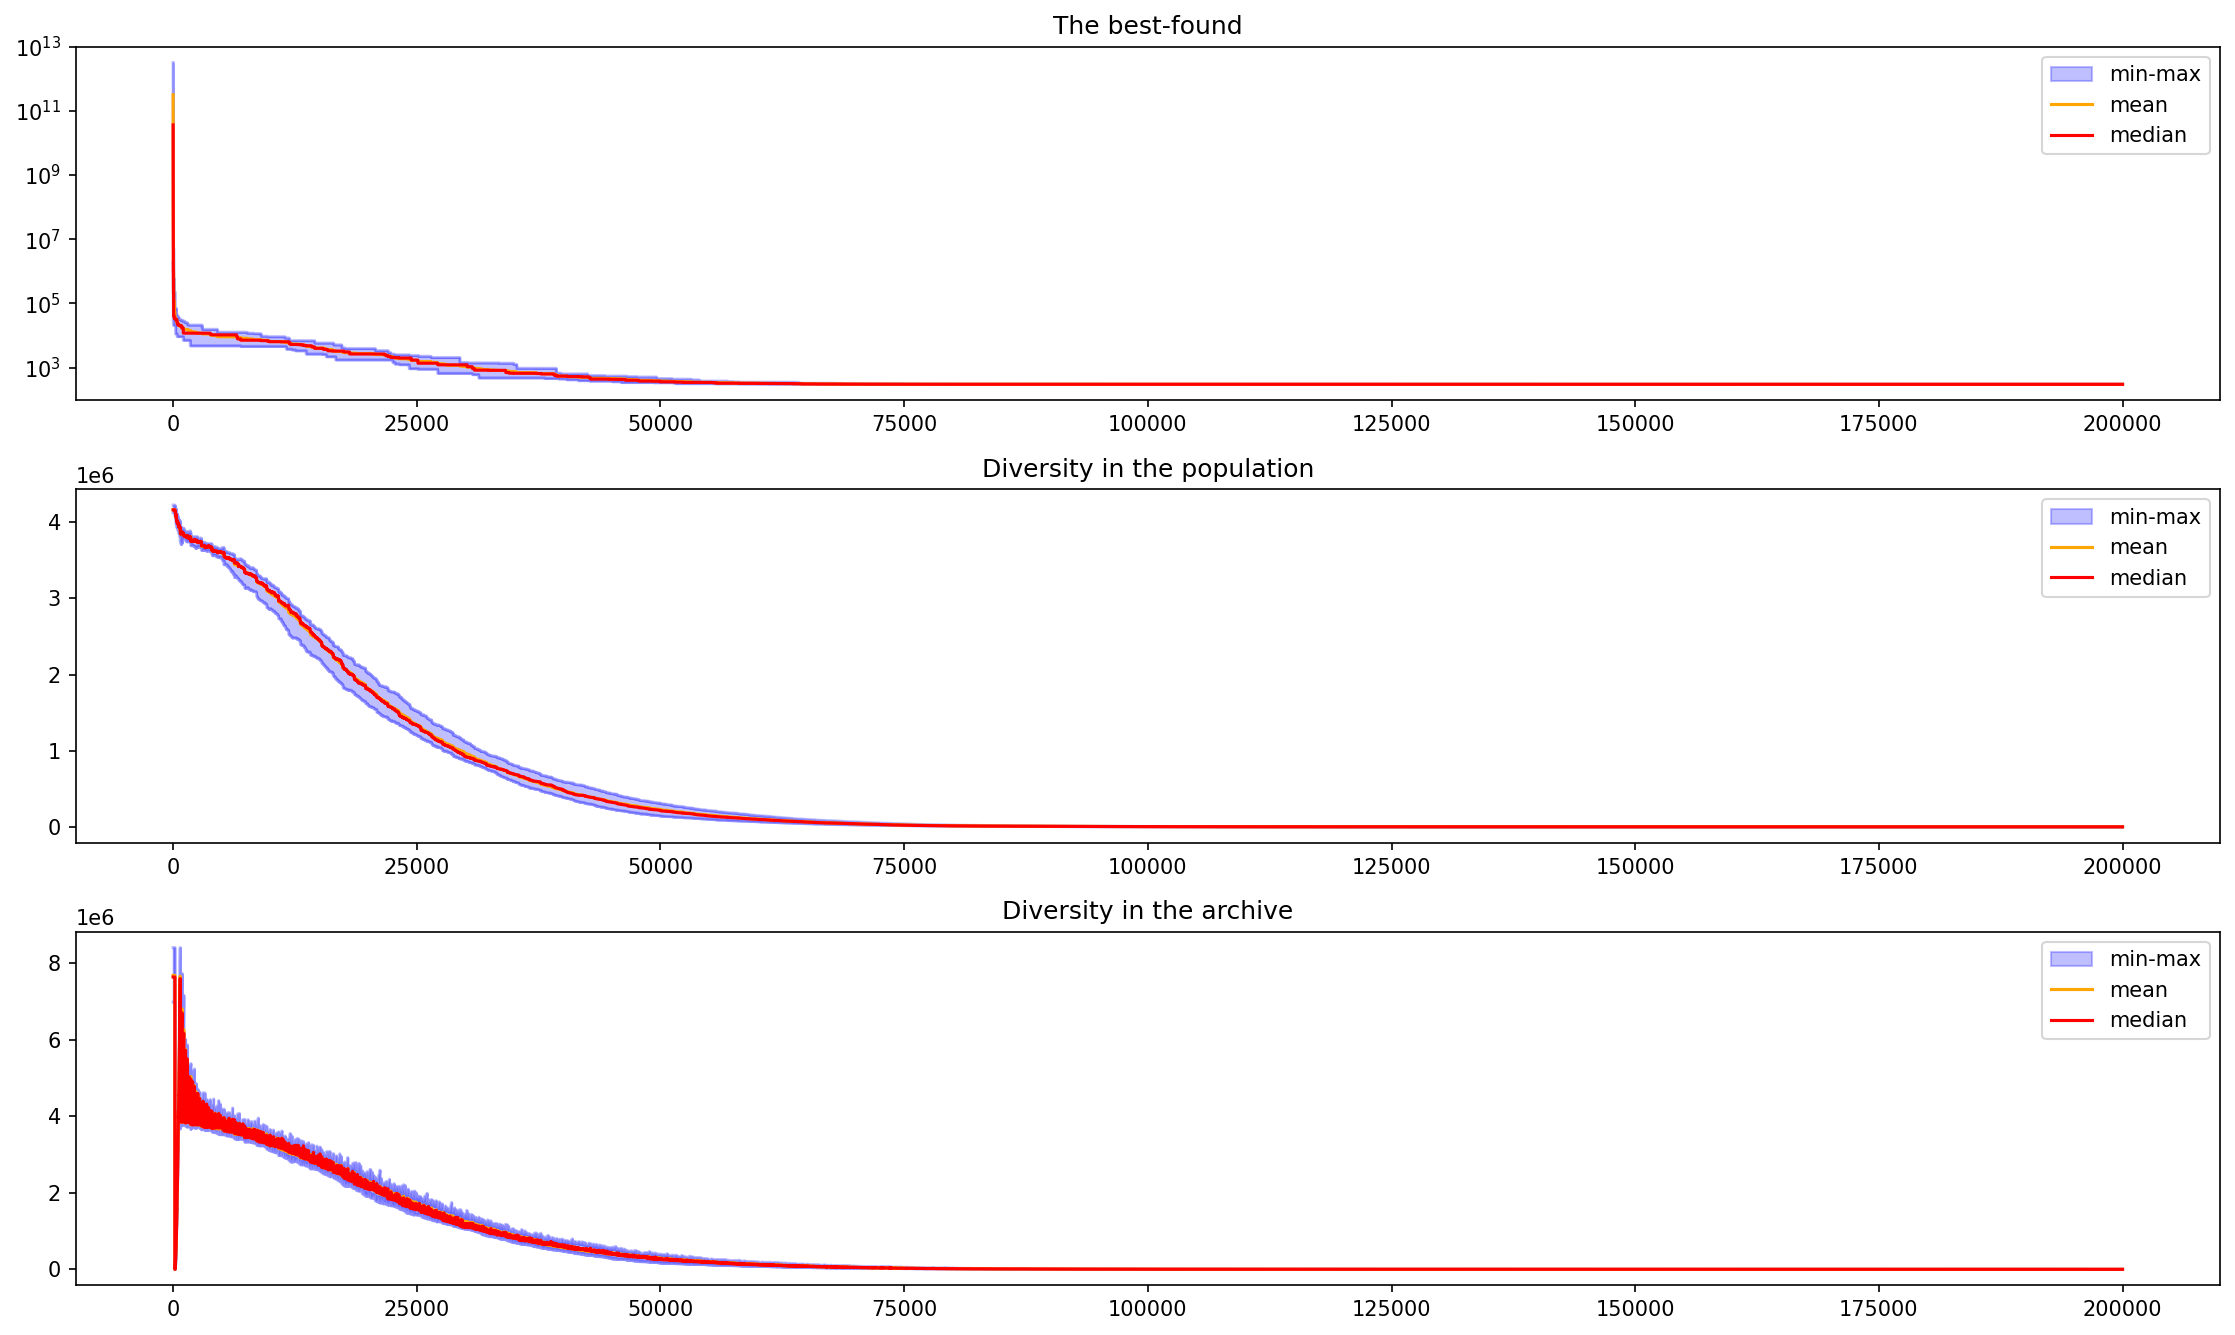

In [72]:
draw_stats_func(1)

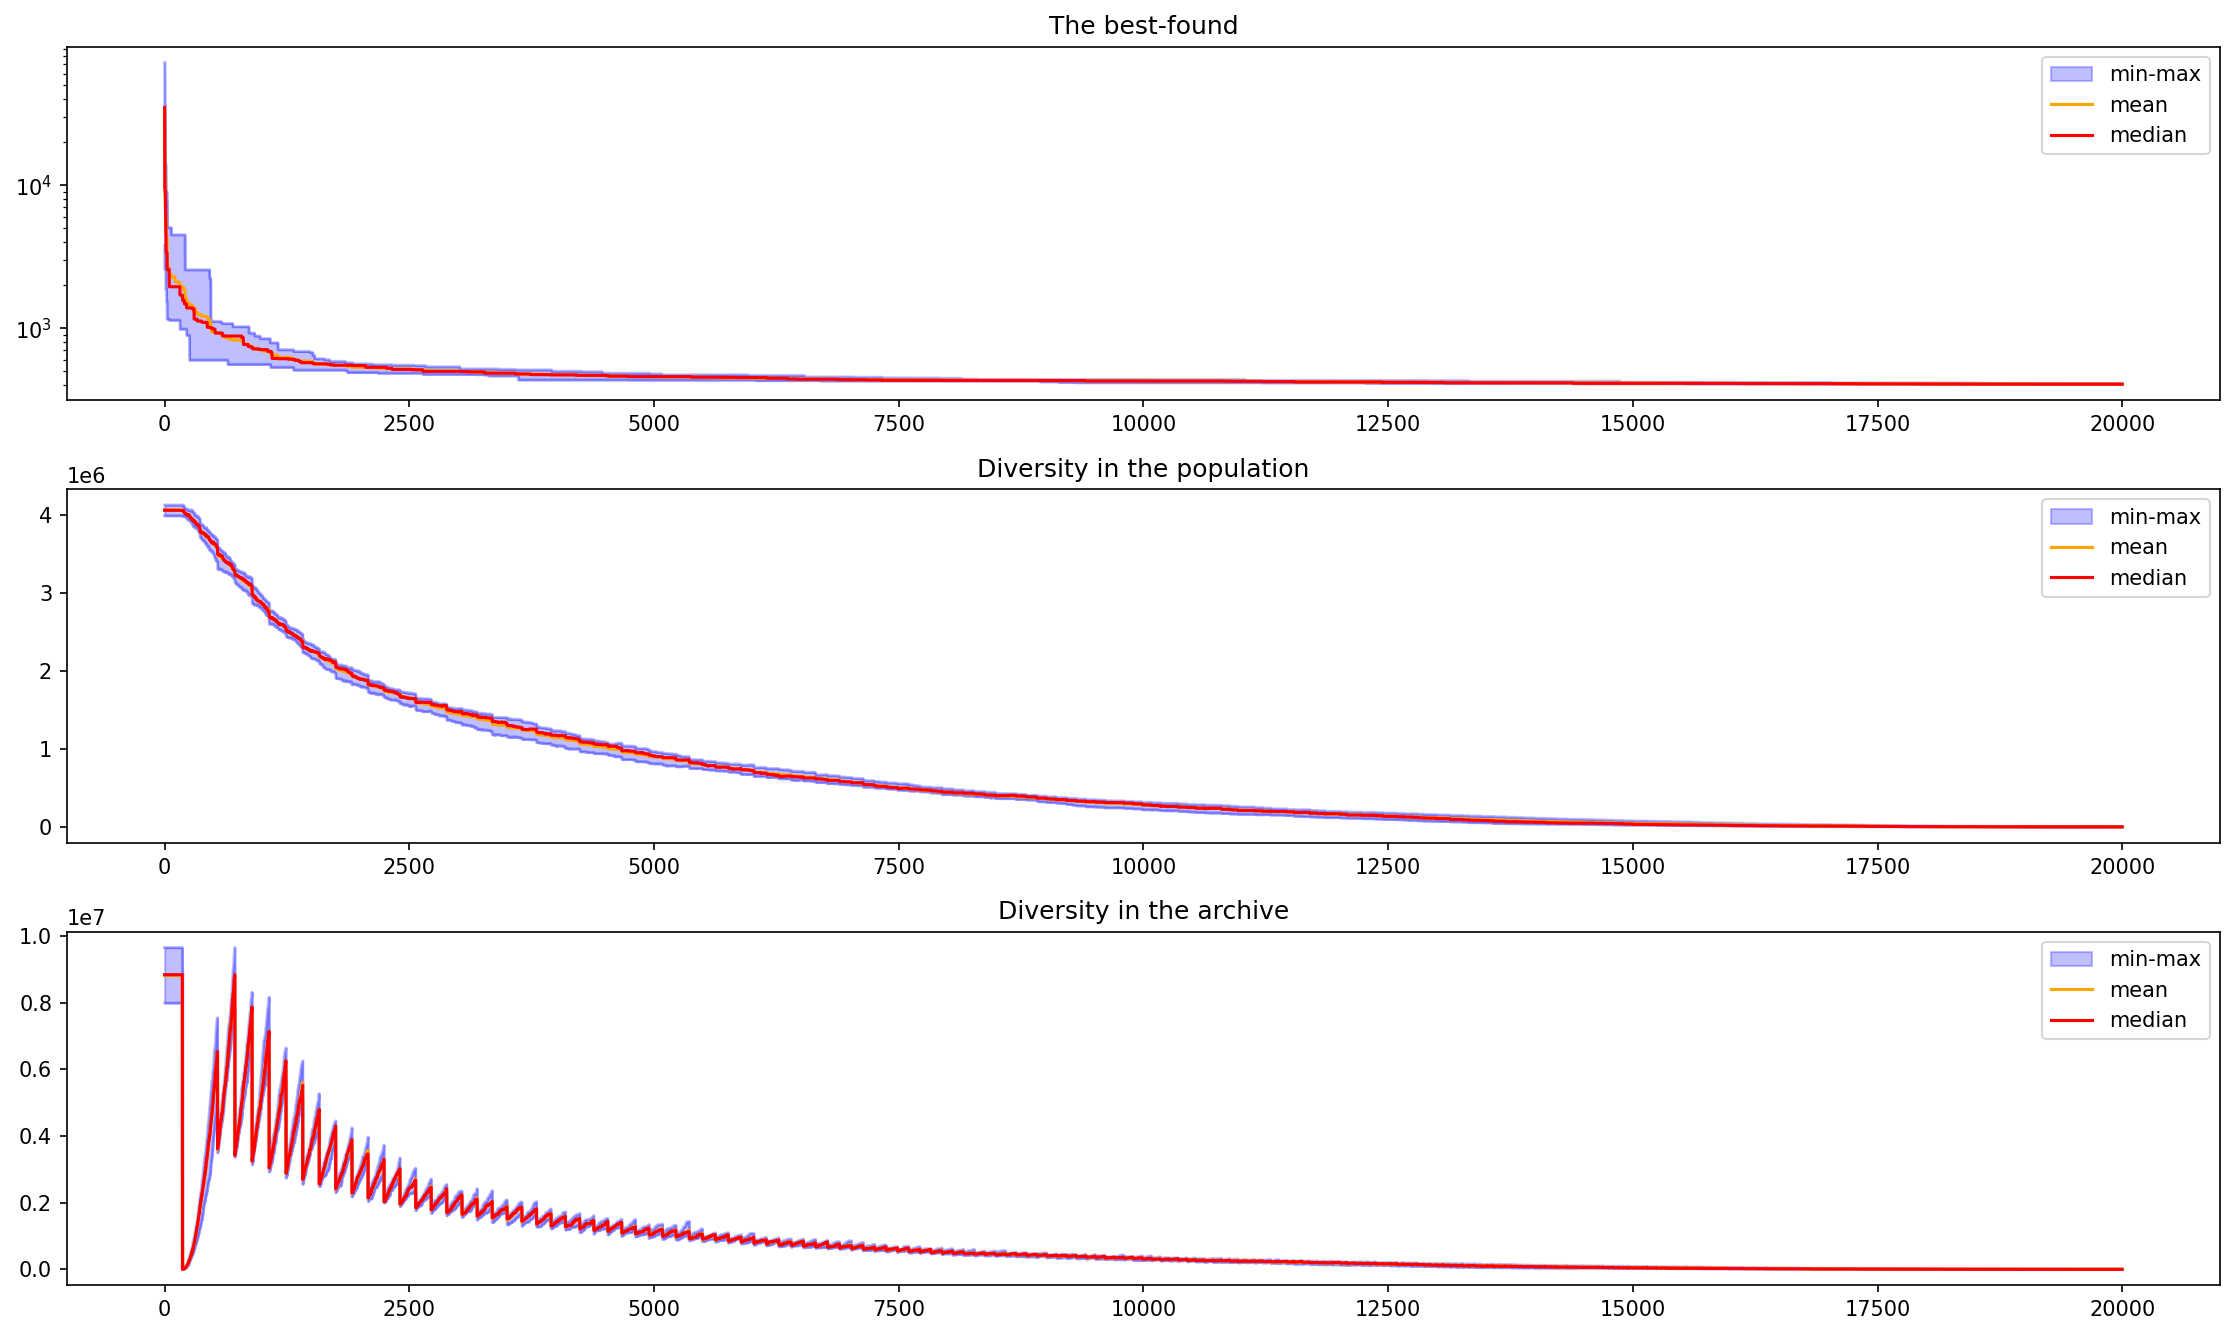

In [69]:
draw_stats_func(2)